In [1]:
import pandas as pd
from pandasql import sqldf

In [2]:
assigned_order = pd.read_csv('../data/Assigned_orders.csv')
completed_order = pd.read_csv('../data/Completed_orders.csv')
courier_debt = pd.read_csv('../data/Courier_debt.csv')

In [3]:
courier_debt['rider_id'] = courier_debt['rider_id'].str.replace('id', 'id_')

In [4]:
assigned_order.columns

Index(['rider_id', 'year_month', 'pay_type_processed', 'assigned', 'rejected'], dtype='object')

In [5]:
completed_order.columns

Index(['rider_id', 'year_month', 'pay_type_processed',
       'total_completed_orders_count'],
      dtype='object')

In [6]:
courier_debt.columns

Index(['rider_id', 'first_online_date', 'vehicle_type', 'last_online_date',
       'debt_2022-10', 'debt_2022-11', 'debt_2022-12', 'debt_2023-01',
       'debt_2023-02', 'debt_2023-03'],
      dtype='object')

In [7]:
courier_debt['rider_id'].nunique()

50202

In [8]:
completed_order['rider_id'].nunique()

37386

In [9]:
assigned_order['rider_id'].nunique()

42844

In [10]:
sqldf(''' SELECT distinct rider_id FROM assigned_order WHERE rider_id not in (SELECT distinct rider_id FROM assigned_order)''')

,rider_id


Hemos validado que toda la tabla de órdenes completadas se encuentre dentro de órdenes asignadas

In [11]:
sqldf(''' SELECT * FROM assigned_order WHERE rider_id not in (SELECT rider_id FROM courier_debt) order by pay_type_processed desc ''')

,rider_id,year_month,pay_type_processed,assigned,rejected
0,id_5764642082471806385,2023-02,PPB,1,1
1,id_5764636073443459204,2023-02,Card,7,7
2,id_5764639444808241093,2023-01,Card,1,0
3,id_5764639925920073051,2023-02,Card,7,7
4,id_5764639995805565220,2023-02,Card,9,9
...,...,...,...,...,...
106,id_5764642572416844553,2023-02,Card,1,1
107,id_5764642606252296460,2023-02,Card,26,26
108,id_5764642644797949747,2023-02,Card,66,63
109,id_5764642705309174155,2023-02,Card,12,12


In [12]:
sqldf(''' SELECT * FROM courier_debt WHERE rider_id not in (SELECT rider_id FROM assigned_order)  ''')

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
0,id_5764607526632949948,2019-10-04,bicycles,20220910,-904.81,-904.81,-904.81,-904.81,-904.81,-904.81
1,id_5764607526800722948,2019-10-12,bicycles,20221030,0.00,-207.48,-207.48,-207.48,-207.48,-207.48
2,id_5764607529464106511,2020-05-18,bicycles,20220922,-847.71,-847.71,-847.71,-847.71,-847.71,-847.71
3,id_5764607530047114589,2019-10-04,bicycles,20220915,-1018.41,-1018.41,-1018.41,-1018.41,-1018.41,-1018.41
4,id_5764607531234101480,2019-10-09,motorcycles,20220929,-1115.95,-1115.95,-1115.95,-1115.95,-1115.95,-1115.95
...,...,...,...,...,...,...,...,...,...,...
7462,id_5764642764721488430,2023-03-01,motorcycles,20230301,0.00,0.00,0.00,0.00,0.00,0.00
7463,id_5764642812607856931,2023-02-28,motorcycles,20230301,0.00,0.00,0.00,0.00,0.00,0.00
7464,id_5764642814579180164,2023-03-01,motorcycles,20230301,0.00,0.00,0.00,0.00,0.00,0.00
7465,id_5764642877946725055,2023-03-01,motorcycles,20230301,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
completed_order[completed_order['rider_id']=='id_5764639925920073051']

,rider_id,year_month,pay_type_processed,total_completed_orders_count


In [14]:
courier_debt[courier_debt['rider_id']=='id_5764607529464106511']

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
26,id_5764607529464106511,2020-05-18,bicycles,20220922,-847.71,-847.71,-847.71,-847.71,-847.71,-847.71


In [15]:
courier_debt[courier_debt['debt_2022-10']==0]

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
2,id_5764607523910846566,2019-09-28,motorcycles,20230210,0.0,0.0,-196.31,-196.31,-196.31,-340.43
5,id_5764607524514827277,2019-10-12,bicycles,20230301,0.0,0.0,-424.10,-85.50,-280.61,-200.14
6,id_5764607525232053991,2022-10-01,motorcycles,20221001,0.0,0.0,0.00,0.00,0.00,0.00
7,id_5764607525320132574,2019-12-06,motorcycles,20230207,0.0,0.0,0.00,0.00,-605.49,-829.65
9,id_5764607525949278203,2019-10-09,bicycles,20230301,0.0,0.0,-673.90,-941.17,-867.25,-731.67
...,...,...,...,...,...,...,...,...,...,...
50197,id_5764642812607856931,2023-02-28,motorcycles,20230301,0.0,0.0,0.00,0.00,0.00,0.00
50198,id_5764642814579180164,2023-03-01,motorcycles,20230301,0.0,0.0,0.00,0.00,0.00,0.00
50199,id_5764642857163948332,2023-02-28,motorcycles,20230228,0.0,0.0,0.00,0.00,0.00,0.00
50200,id_5764642877946725055,2023-03-01,motorcycles,20230301,0.0,0.0,0.00,0.00,0.00,0.00


Básicamente, he encontrado que la tabla de deudas agrupa "posiblemente a todos los riders que al menos hayan hecho algún pedido, no sé si específicamente de un PPB", pero por ejemplo, no salen algunos riders de la tabla de asignados porque se entiende que no han culminado ningún pedido. Además, la tabla de deudas también contiene deudas vacías

órdenes asignadas -> órdenes completadas -> deuda de rider <- órdenes completadas de meses anteriores al 23-10

Lo primero que haré, será agrupar a los riders en base al tipo de vehículo

In [16]:
courier_debt.groupby('vehicle_type')[['debt_2022-10', 'debt_2022-11', 'debt_2022-12', 'debt_2023-01', 'debt_2023-02', 'debt_2023-03']].sum()

,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
vehicle_type,,,,,,
bicycles,-4824645.27,-8443691.55,-12780399.47,-19802580.74,-28243232.18,-35316401.47
motorcycles,-1610114.59,-2172876.09,-2574505.96,-2997426.63,-3375683.06,-3943650.45
pedestrians,-27561.36,-46309.93,-54761.78,-63399.31,-64490.80,-75338.47


In [17]:
courier_debt['vehicle_type'].unique()

array(['bicycles', 'motorcycles', 'pedestrians'], dtype=object)

In [18]:
total = 35316401.47 + 3943650.45 + 75338.47
bicicletas = round((35316401.47 / total) *100,1)
moto = round((3943650.45 / total) * 100,1 )
persona = round((75338.47 / total) * 100,1 )

In [19]:
print('La deuda acumulada de los vehículos de bicicletas representa el ' + str(bicicletas)+'%' )
print('La deuda acumulada de los vehículos de moto representa el ' + str(moto)+'%' )
print('La deuda acumulada de los vehículos de persona representa el ' + str(persona)+'%' ) 

La deuda acumulada de los vehículos de bicicletas representa el 89.8%
La deuda acumulada de los vehículos de moto representa el 10.0%
La deuda acumulada de los vehículos de persona representa el 0.2%


In [20]:
sqldf(''' SELECT COUNT(rider_id),vehicle_type FROM courier_debt group by vehicle_type''')

,COUNT(rider_id),vehicle_type
0,41299,bicycles
1,8623,motorcycles
2,280,pedestrians


Podemos observar que, a pesar de que la mayoría de la deuda está en las bicicletas, la mayoría de riders son bicicletas y representa casi el mismo porcentaje (cerca al 90%), por lo que esta segmentación  no nos ayudará a encontrar el problema.

<Axes: xlabel='debt_2023-03', ylabel='Count'>

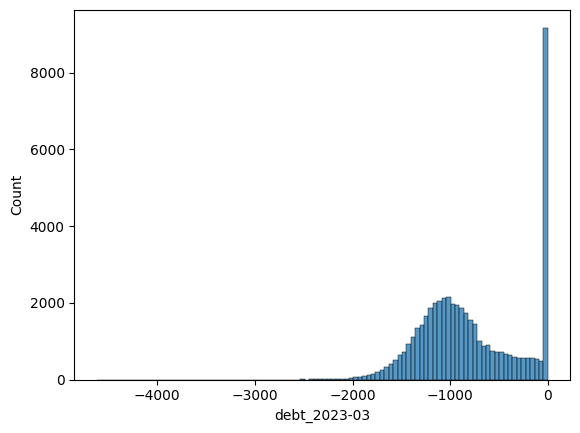

In [21]:
import seaborn as sns

sns.histplot(courier_debt['debt_2023-03'])